## 4-3. 스크래핑 결과 시각화하기 I - 해시코드 질문태그 빈도 시각화

- bs4와 Seaborn을 이용해서 질문의 주제 빈도를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 태그의 빈도 확인

이전에 진행한 해시코드(https://hashcode.co.kr) 사이트에선 다양한 질문이 올라왔는데,  
질문제목 아래에 "태그"가 있었습니다.

이 태그의 빈도를 측정하면 어떤 주제의 질문이 많이 올라오는지 알 수 있을 것 같습니다.  
이를 스크래핑 후 시각화해봅시다.

In [1]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [2]:
# 필요한 라이브러리를 불러온 후, 요청을 진행해봅시다.

import requests
from bs4 import BeautifulSoup

res=requests.get("https://hashcode.co.kr")


In [12]:
# 응답을 바탕으로 BeautifulSoup 객체를 생성해봅시다.

soup=BeautifulSoup(res.text, "html.parser")
ul_tags=soup.find_all("ul", "question-tags")

In [11]:
# 질문의 빈도를 체크하는 dict를 만든 후, 빈도를 체크해봅시다.

frequency={}

for ul in ul_tags:
    li_tags=ul.find_all("li")
    for li in li_tags:
        tag=li.text.strip()
        if tag not in frequency:
            frequency[tag] = 1
        else:
            frequency[tag] += 1

print(frequency)

{'beautifulsoup': 2, 'replace': 1, 'python': 20, 'pandas': 2, 'dataframe': 2, 'ai': 1, 'gui': 1, 'tkinter': 1, 'software_development': 1, 'java': 6, 'javac': 1, 'json': 1, 'return': 1, 'asp.net': 1, 'c': 4, 'ubuntu': 1, 'vmware': 1, 'multithreading': 1, 'algorithm': 2, 'coding-test': 2, 'bfs': 1, 'react': 1, 'javascript': 4, 'arduino': 1, 'node.js': 3, 'regex': 2, 'multiprocessing': 1, 'pygame': 1, 'html': 2, 'css': 2, 'application-development': 1, 'logistic-regression': 1, 'logistic': 1, 'error': 1, 'csv': 1, 'class': 1, 'instance': 1, 'hashmap': 1, 'object': 1, 'windows': 1, 'for': 1, 'selenium-webdrive': 1, 'c++': 1}


In [16]:
# Counter를 사용해 가장 빈도가 높은 value들을 추출합니다.
from collections import Counter

counter=Counter(frequency)

print(type(counter))
counter.most_common(10)


<class 'collections.Counter'>


[('python', 20),
 ('java', 6),
 ('c', 4),
 ('javascript', 4),
 ('node.js', 3),
 ('beautifulsoup', 2),
 ('pandas', 2),
 ('dataframe', 2),
 ('algorithm', 2),
 ('coding-test', 2)]

<Axes: >

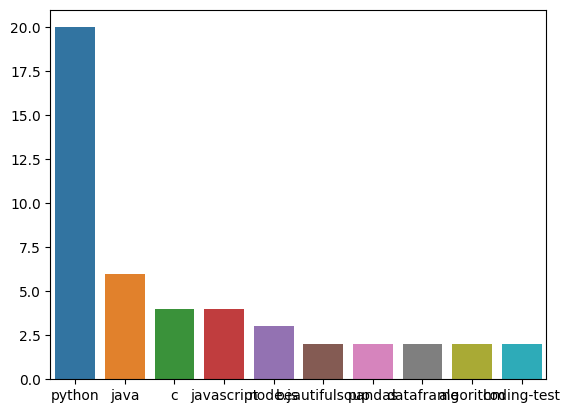

In [18]:
# Seaborn을 이용해 이를 Barplot으로 그립니다.

import seaborn as sns

x=[elem[0] for elem in counter.most_common(10)]
y=[elem[1] for elem in counter.most_common(10)]

sns.barplot(x=x, y=y)

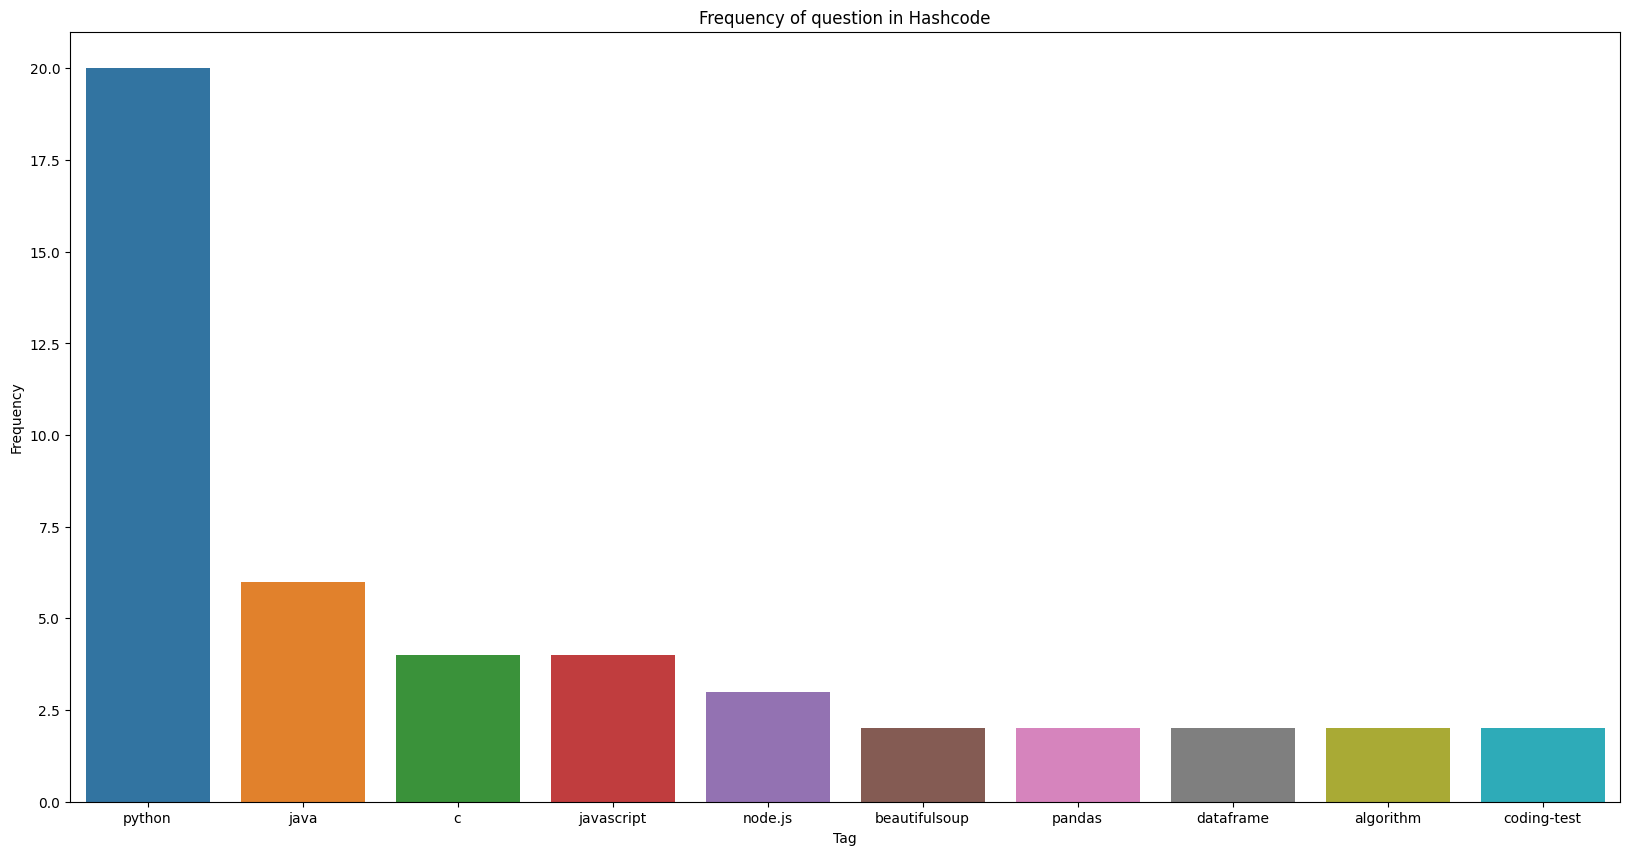

In [21]:
# figure, xlabel, ylabel, title을 적절하게 설정해서 시각화를 완성해봅시다.

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.title("Frequency of question in Hashcode")
plt.xlabel("Tag")
plt.ylabel("Frequency")

sns.barplot(x=x, y=y)

plt.show()